In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances

# Exponentially Weighted k-Nearest Neighbors

The **exponentially weighted knn** method uses all of the neighbors of a new point $x_{\rm new}$ rather than only the nearest $k$ neighbors. 
Each neighbor is assigned a weight, according to its distance to $x_{\rm new}$.

The weights are a function of a constant $\alpha$, a number bounded by zero and one.
The weight of the $i$th nearest neighbor is given by

$$
w_i = \alpha(1-\alpha)^{i-1} \quad \mbox{for }i=1,2,\ldots,n
$$

Large values of $\alpha$ place more weight on the nearest neighbors and produce weights that decay rapidly to zero, whereas the rate of decay is slower for smaller values of $\alpha$.
Notice that the nearest neighbor ($i=1$) receives the weight $w_1=\alpha$.

## Part 1

Implement the exponentially weighted knn method

In [58]:
def knn_classifier(k=2,X,y,X_new,alpha=2, weights='uniform'):
    from sklearn.metrics import pairwise_distances
    
    # number of datapoints
    m,_ = X.shape
    m_new,_ = X_new.shape
    
    # classes and number of classes
    labels = np.unique(y)
    n_classes = len(labels)
    
    # distance matrix
    dist = pairwise_distances(X,X_new)
    
    # k nearest neighbor
    knn = np.argsort(dist,axis=0)[0:k]
    
    y_pred = np.zeros(m_new).astype(int)
    for i in range(m_new):
        # labels
        nearest_labels = y[knn[:,i]]
        # weights
        if weights=='uniform':
            w = np.ones(k)
        elif weights=='distance':
            w=1/dist[knn[:,i],i]
        elif weights=='exponential':
            w=(alpha)*((1-alpha)**(dist[knn[:,i],i]-1))
        # prediction
        y_pred[i] = np.argmax(np.bincount(nearest_labels, minlength=n_classes, weights=w))
    return y_pred, labels    

SyntaxError: non-default argument follows default argument (Temp/ipykernel_19400/530411182.py, line 1)

## Part 2: The MNIST dataset revisited

In [59]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits.csv'
data = pd.read_csv(url)
data.head(5)

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [60]:
X = data.iloc[:,0:784].to_numpy() # pixels
y = data['label'].to_numpy() # labels

**Part 2-a:** Split the dataset into training and validation sets.

In [61]:
X_train, X_val, y_train, y_val=train_test_split(X,y)

**Part 2-b:** Use the validation set to tune-in the parameter $\alpha$.

In [81]:
a_list=np.linspace(0,1,5)
a_list

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Text(0.5, 0, 'k (number of neighbors)')

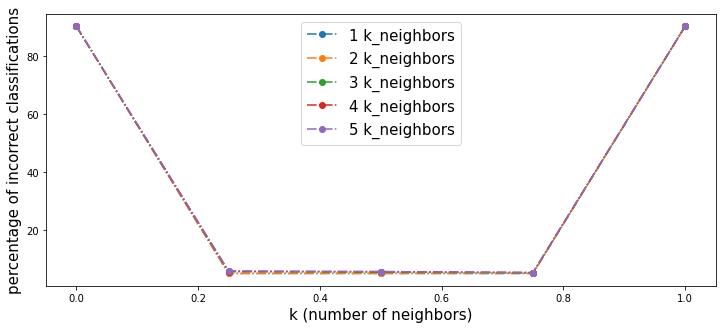

In [85]:
weights = ['uniform', 'distance','exponential']
k_list = np.arange(1,6)
a_list=np.linspace(0,1,5)
plt.figure(figsize=(12,5))

# loop over A values
for j in range(len(k_list)):
    pct_incorrect = np.zeros(len(k_list))
    for i in range (len(a_list)):
# knn classifier
        y_val_pred,_ = knn_classifier(k_list[j],
                                    X_train,y_train,X_val,
                                    weights='exponential',
                                    alpha=a_list[i])
        # percentage of incorrect classification
        pct_incorrect[i] = 100*np.sum(y_val!=y_val_pred)/len(y_val)
    plt.plot(a_list, pct_incorrect,'o-.', label= str(k_list[j])+' k_neighbors')
plt.legend(fontsize=15)
plt.ylabel('percentage of incorrect classifications', fontsize=15)
plt.xlabel('k (number of neighbors)', fontsize=15)

**Part 2-c:** Test the classifier on the following test set

In [56]:
# load test data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits_test.csv'
test_data = pd.read_csv(url)

In [57]:
X_test = test_data.iloc[:,0:784].to_numpy() # pixels
y_test = test_data['label'].to_numpy() # labels

In [87]:
y_test_pred,labels = knn_classifier(6,X_train,y_train,X_test,alpha=.3, weights='distance')

In [88]:
'Confusion matrix'
def confusion_matrix(y,y_pred,labels):
    C = np.zeros((len(labels),len(labels)))
    for i,label_i in enumerate(labels):
        for j,label_j in enumerate(labels):
            C[i,j]=sum(y_pred[y==label_i]==label_j)
    return C
confusion_matrix(y_test,y_test_pred,labels)

array([[203.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.],
       [  0., 222.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   6., 175.,   1.,   1.,   0.,   0.,   1.,   0.,   0.],
       [  0.,   6.,   6., 174.,   0.,   2.,   1.,   2.,   4.,   0.],
       [  0.,   4.,   0.,   0., 185.,   0.,   1.,   0.,   0.,  14.],
       [  1.,   2.,   0.,   1.,   0., 173.,   3.,   0.,   4.,   1.],
       [  3.,   1.,   0.,   0.,   0.,   1., 189.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   0.,   0.,   0.,   0., 203.,   0.,   6.],
       [  2.,   9.,   0.,   8.,   2.,   0.,   4.,   1., 150.,   7.],
       [  0.,   2.,   0.,   4.,   3.,   0.,   0.,   3.,   0., 203.]])

In [89]:
# percentage of correct classification
100*np.sum(y_test==y_test_pred)/len(y_test)

93.85